<a href="https://colab.research.google.com/github/neerja198/covid-19-X-Ray-Image-Preprocessing/blob/master/Anlysis_of_Covid_19_Xray_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this assignment is to see if we can build a classifier which can predict the chance of a person having COVID19, given their xray.

The dataset for this assignment has been taken from kaggle for healthy pateints and https://github.com/ieee8023/covid-chestxray-dataset for COVID patients. The positive cases are of patients diagonised with COVID, and negative casses are people detected with other forms of infection and not covid and there few sample of healthy patients as well

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# !unzip keras-covid-19.zip

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D

from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from imutils import paths
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import argparse
import cv2
import os
import random

In [0]:
INIT_LR = 1e-3    
EPOCHS = 25

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images("/content/drive/My Drive/Tina/dataset"))
data = []
labels = []

[INFO] loading images...


In [0]:
random.shuffle(imagePaths)
imagePaths  ## this should have the path to all the images

['/content/drive/My Drive/Tina/dataset/normal/person934_virus_1595.jpeg',
 '/content/drive/My Drive/Tina/dataset/covid/ryct.2020200034.fig5-day0.jpeg',
 '/content/drive/My Drive/Tina/dataset/normal/NORMAL2-IM-0696-0001.jpeg',
 '/content/drive/My Drive/Tina/dataset/covid/ryct.2020200034.fig2.jpeg',
 '/content/drive/My Drive/Tina/dataset/normal/IM-0240-0001.jpeg',
 '/content/drive/My Drive/Tina/dataset/normal/person612_bacteria_2478.jpeg',
 '/content/drive/My Drive/Tina/dataset/covid/nCoV-radiol.2020200269.fig1-day7.jpeg',
 '/content/drive/My Drive/Tina/dataset/normal/person939_bacteria_2864.jpeg',
 '/content/drive/My Drive/Tina/dataset/covid/lancet-case2b.jpg',
 '/content/drive/My Drive/Tina/dataset/normal/person1558_bacteria_4066.jpeg',
 '/content/drive/My Drive/Tina/dataset/normal/person989_virus_1667.jpeg',
 '/content/drive/My Drive/Tina/dataset/covid/radiopedia-covid-19-pneumonia-2.jpg',
 '/content/drive/My Drive/Tina/dataset/normal/NORMAL2-IM-0869-0001.jpeg',
 '/content/drive/My Dr

**When the image file is read with the OpenCV function imread(), the order of colors is BGR (blue, green, red). On the other hand, in Pillow, the order of colors is assumed to be RGB (red, green, blue).Therefore, if you want to use both the Pillow function and the OpenCV function, you need to convert BGR and RGB.**

**Convolutional Neural Networks as accepting fixed size inputs (i.e., 224×224, 227×227, 299×299, etc.).**

In [0]:
# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]

    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath) ## all the images are stored as a numpy array
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    image = cv2.resize(image, (224, 224))

    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
    #labels.append(mapping[label])

In [0]:
### getting the shape of the images
image.shape

(224, 224, 3)

In [0]:
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 255]
data = np.array(data) / 255.0
labels = np.array(labels)

In [0]:
len(labels) == len(data)

True

##Q1 perform one hot encoding of the labels and make sure its called labels

For binary class we sometimes don't need to do one hot encoding since we can assign one as 0 and the other as 1. However in this case we are going to calculate the probability for both outcomes. 

In [0]:
# perform one-hot encoding on the labels 
# hint there should be now two columns in Y

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y = onehot_encoder.fit_transform(integer_encoded)

In [0]:
Y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

Q2
**partition the data into training and testing splits using 80% of
the data for training and the remaining 20% for testing
make sure the output of the split is called as trainX,testX,trainY,testY**

In [0]:
X = data
y = Y

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)

The below part does image augmentation as discussed during the lecture in class, over here we are rotating the image by upto 15 degrees, but you are open to try other augmentation techniques as well

In [0]:
# initialize the training data augmentation object
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

Q3 create a model architecture below, make sure the input takes in images of `224*224*3` and the output is 2, given that we have 2 labels to predict

In [0]:
#'''This part needs to be done as part of HW'''

def make_model():
    model = Sequential()
    model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    return model

In [0]:
model = make_model()

In [0]:
### defining the loss, and compiling the model
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


## Q4)Fit our model on train data




In [0]:
# Train the network
H = model.fit(trainX, trainY, epochs=EPOCHS, validation_data=(testX, testY), verbose=1)

Epoch 1/25
2/2 [==============================] - 1s 441ms/step - loss: 1.3363 - accuracy: 0.5250 - val_loss: 17.7897 - val_accuracy: 0.7000
Epoch 2/25
2/2 [==============================] - 1s 352ms/step - loss: 26.6235 - accuracy: 0.4750 - val_loss: 19.4001 - val_accuracy: 0.3000
Epoch 3/25
2/2 [==============================] - 1s 354ms/step - loss: 13.6523 - accuracy: 0.5000 - val_loss: 8.0552 - val_accuracy: 0.3000
Epoch 4/25
2/2 [==============================] - 1s 352ms/step - loss: 7.0101 - accuracy: 0.6000 - val_loss: 0.2197 - val_accuracy: 0.8000
Epoch 5/25
2/2 [==============================] - 1s 350ms/step - loss: 2.7014 - accuracy: 0.8000 - val_loss: 2.0711 - val_accuracy: 0.8000
Epoch 6/25
2/2 [==============================] - 1s 346ms/step - loss: 2.8283 - accuracy: 0.7000 - val_loss: 1.3929 - val_accuracy: 0.8000
Epoch 7/25
2/2 [==============================] - 1s 369ms/step - loss: 1.4773 - accuracy: 0.7750 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 8/25
2/2 [

In [0]:
score = model.evaluate(testX, testY, verbose=1)

1/1 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 1.0000


##Q5) CALCULATE THE ACCURACY ON TRAIN AND TEST SET, AND ALSO SHOW THE CONFUSION MATRIX AND PLOT THE ROC CURVE

See [link](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) for some background on what actually is ROC curve. We will review this in class.
See [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#) for python example.

The main idea behind using AUC/ROC is that, though the model accuracy is very high, the model might not be learning the important examples well, and one way to check the models ability to check for generalization, is by using the AUC ROC curve

In [0]:
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability

# make predictions on the taining set
print("[INFO] evaluating network...")
train_probs = model.predict(trainX)
train_predIdxs = np.argmax(train_probs, axis=1)

# show a nicely formatted classification report
print(classification_report(trainY.argmax(axis=1), train_predIdxs,target_names=label_encoder.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       covid       1.00      1.00      1.00        18
      normal       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [0]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX)
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,target_names=label_encoder.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       covid       1.00      1.00      1.00         7
      normal       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [0]:
fpr, tpr, thresholds = roc_curve(trainY[:,0], train_probs[:, 0])
auc = roc_auc_score(trainY, train_probs)
print('AUC: %.3f' % auc)

AUC: 1.000


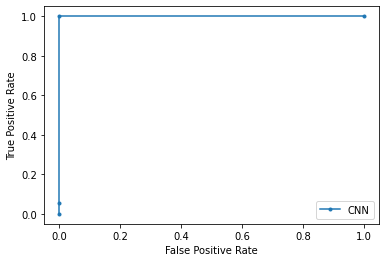

In [0]:
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(trainY[:,0], train_probs[:, 0])

# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='CNN')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

## PLOT THE train and test less and the train and test accuracy for every epoch in one single plot

Most of the time as we increase the number of epochs the model performs better on train set but, starts to perform worse on validation set. In such cases, we use these plots, to decide which is the most optimal epoch at which the model dosent overfit, and we take the model corresponding to that epoch to test on unseen examples.

Tensorflow lets you save your model after every epoch, you can also experiment with saving and loading the trained models (Optional)

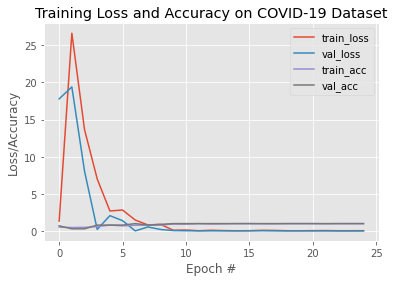

In [0]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")


Text(0.5, 0, 'Epoch #')

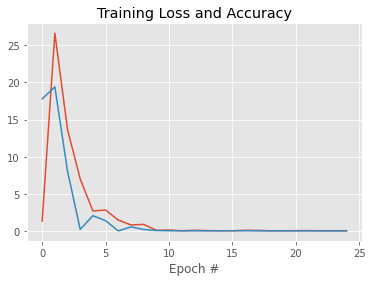

In [0]:
# Plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")

##Q6) Can you think of a case where the model has an accuracy of 99% and still the model would not be considered a good model?, if yes provide an example of such a case, and explain your intuition

Yes, I can think of a case where the model has an accuracy of 99% and it still would not be considered a good model.
A situation where the model is overfitting and the model is severely skewed.
An example would be a binary classification model where the dataset is 95% of one class and
only 5% of another class. A model that is overfit will be highly accurate for the training and 
will not be able too handle new data.
This can be found in regression models that are overfit to training data.  